In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from dlomix.losses import masked_spectral_distance, masked_pearson_correlation_distance
from dlomix.data import FragmentIonIntensityDataset

import os

2024-11-11 08:14:36.529536: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 08:14:36.574449: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 08:14:36.574493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 08:14:36.576318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 08:14:36.584399: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 08:14:36.585276: I tensorflow/core/platform/cpu_feature_guard.cc:1


Avaliable feature extractors are (use the key of the following dict and pass it to features_to_extract in the Dataset Class):
{
   "atom_count": "Atom count of PTM.",
   "delta_mass": "Delta mass of PTM.",
   "mod_gain": "Gain of atoms due to PTM.",
   "mod_loss": "Loss of atoms due to PTM.",
   "red_smiles": "Reduced SMILES representation of PTM."
}.
When writing your own feature extractor, you can either
    (1) use the FeatureExtractor class or
    (2) write a function that can be mapped to the Hugging Face dataset.
In both cases, you can access the parsed sequence information from the dataset using the following keys, which all provide python lists:
    - _parsed_sequence: parsed sequence
    - _n_term_mods: N-terminal modifications
    - _c_term_mods: C-terminal modifications



In [ ]:
# get files in the directory
run_name = "c_r_FiLM_full_d10_static_0.0005_skk"

subdir = '/cmnfs/proj/prosit_astral/saved_models/%s/' % (run_name)

files = [ os.path.join(subdir, file_name) for file_name in os.listdir(subdir) ] 
files.sort(reverse=True)

print('\n'.join(files))
print(len(files))

In [2]:
run_name = "c_r_FiLM_full_d10_static_0.0005_9kK"
run_name = "c_r_FiLM_full_d10_static_0.0005_25x"
run_name = "c_r_FiLM_full_d10_static_0.0005_acf"
run_name = "c_r_FiLM_full_d10_static_0.0005_kq4"

final_model = '/cmnfs/proj/prosit_astral/saved_models/final_models/%s.keras' % (run_name)

model = keras.saving.load_model(final_model,
                                custom_objects={'masked_spectral_distance': masked_spectral_distance, 
                                                'masked_pearson_correlation_distance': masked_pearson_correlation_distance}, 
                                compile=True, safe_mode=True)

#print("Finished loading model %s" % file.split('/')[-1])

KeyboardInterrupt: 

In [ ]:
models = [  # Random
    "c_r_FiLM_full_d10_static_0.0005_9kK",
    "c_r_FiLM_full_d10_static_0.0005_25x",
    "c_r_FiLM_full_d10_static_0.0005_acf",
    "c_r_FiLM_full_d10_static_0.0005_kq4",
]

models = [  # Identity
    "c_i_FiLM_full_d10_static_0.0005_ITy",
    "c_i_FiLM_full_d10_static_0.0005_P4k",
    "c_i_FiLM_full_d10_static_0.0005_953",
    "c_i_FiLM_full_d10_static_0.0005_z1B",
]

loaded_models = [
    keras.saving.load_model('/cmnfs/proj/prosit_astral/saved_models/final_models/%s.keras' % (model),
                            custom_objects={'masked_spectral_distance': masked_spectral_distance, 
                                            'masked_pearson_correlation_distance': masked_pearson_correlation_distance}, 
                            compile=True, safe_mode=True)
    for model in models
]

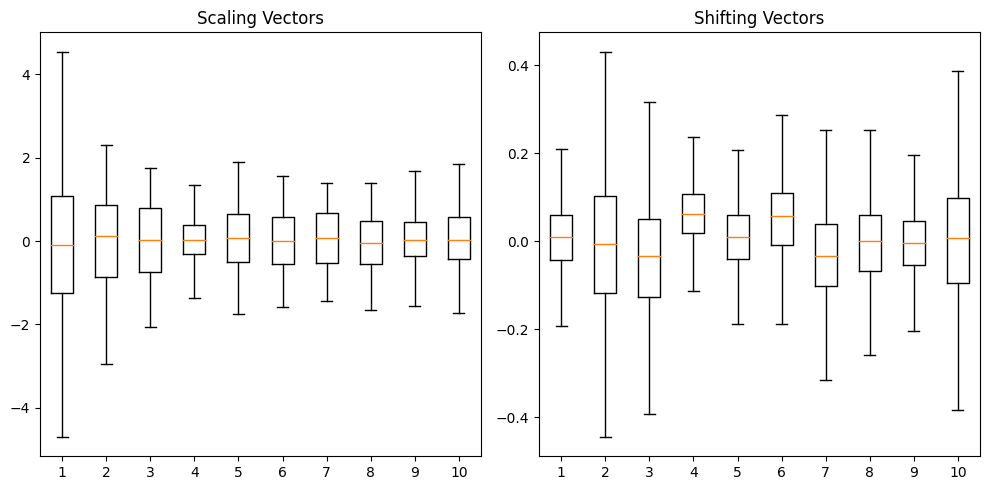

In [8]:
import matplotlib.pyplot as plt
import numpy as np

result = loaded_models[2].get_meta_vector(eval_batches[0][0])
res = tf.split(result, 20, axis=-1)

vals = [tf.reshape(res[i], [-1]) for i in range(0, 20, 2)]
vals2 = [tf.reshape(res[i], [-1]) for i in range(1, 20, 2)]

# Create a figure and a set of subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first boxplot
ax1.boxplot(vals, showfliers=False)


ax1.set_title('Scaling Vectors')

# Plot the second boxplot
ax2.boxplot(vals2, showfliers=False)
ax2.set_title('Shifting Vectors')

# Show the plot
plt.tight_layout()
plt.show()

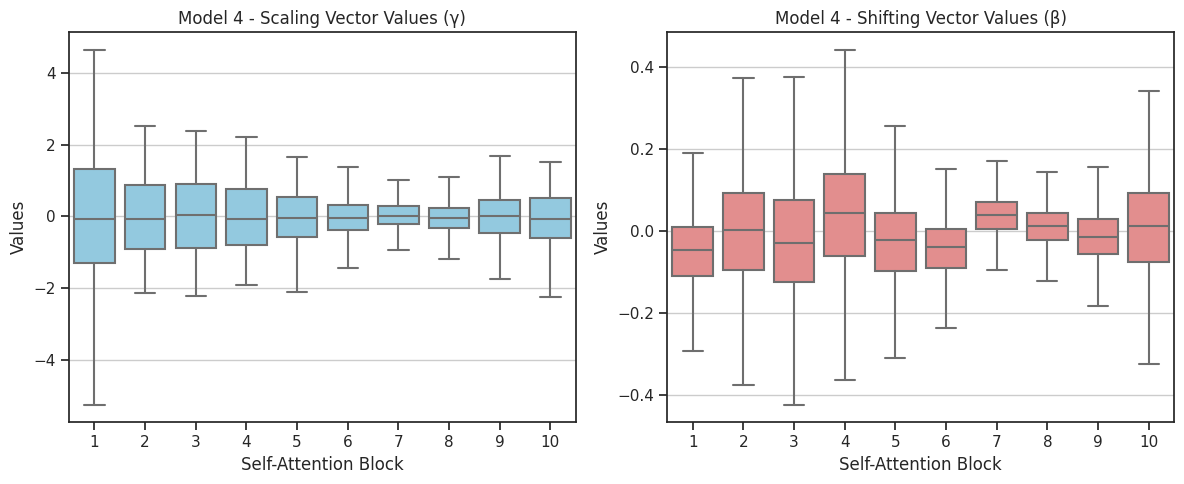

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Set the theme
sns.set_theme(style="ticks")

result = loaded_models[3].get_meta_vector(eval_batches[0][0])
res = tf.split(result, 20, axis=-1)

vals1 = [tf.reshape(res[i], [-1]) for i in range(0, 20, 2)]
vals2 = [tf.reshape(res[i], [-1]) for i in range(1, 20, 2)]

# Concatenate vals1 and vals2
values_1 = np.concatenate(vals1)
values_2 = np.concatenate(vals2)

# Repeat labels
labels = np.repeat([1,2,3,4,5,6,7,8,9,10], [262144] * 10)

# Create dataframes
df1 = pd.DataFrame({'Values': values_1, 'Self-Attention Block': labels})
df2 = pd.DataFrame({'Values': values_2, 'Self-Attention Block': labels})

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for vals1
sns.boxplot(x='Self-Attention Block', y='Values', data=df1, showfliers=False, color='skyblue', ax=ax1)
ax1.set_title('Model 4 - Scaling Vector Values (γ)')
ax1.set_xlabel('Self-Attention Block')
ax1.set_ylabel('Values')

# Plot for vals2
sns.boxplot(x='Self-Attention Block', y='Values', data=df2, showfliers=False, color='lightcoral', ax=ax2)
ax2.set_title('Model 4 - Shifting Vector Values (β)')
ax2.set_xlabel('Self-Attention Block')
ax2.set_ylabel('Values')

# y_min = min(np.min(values_1), np.min(values_2))
# y_max = max(np.max(values_1), np.max(values_2))
# ax1.set_ylim(y_min, y_max)
# ax2.set_ylim(y_min, y_max)

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

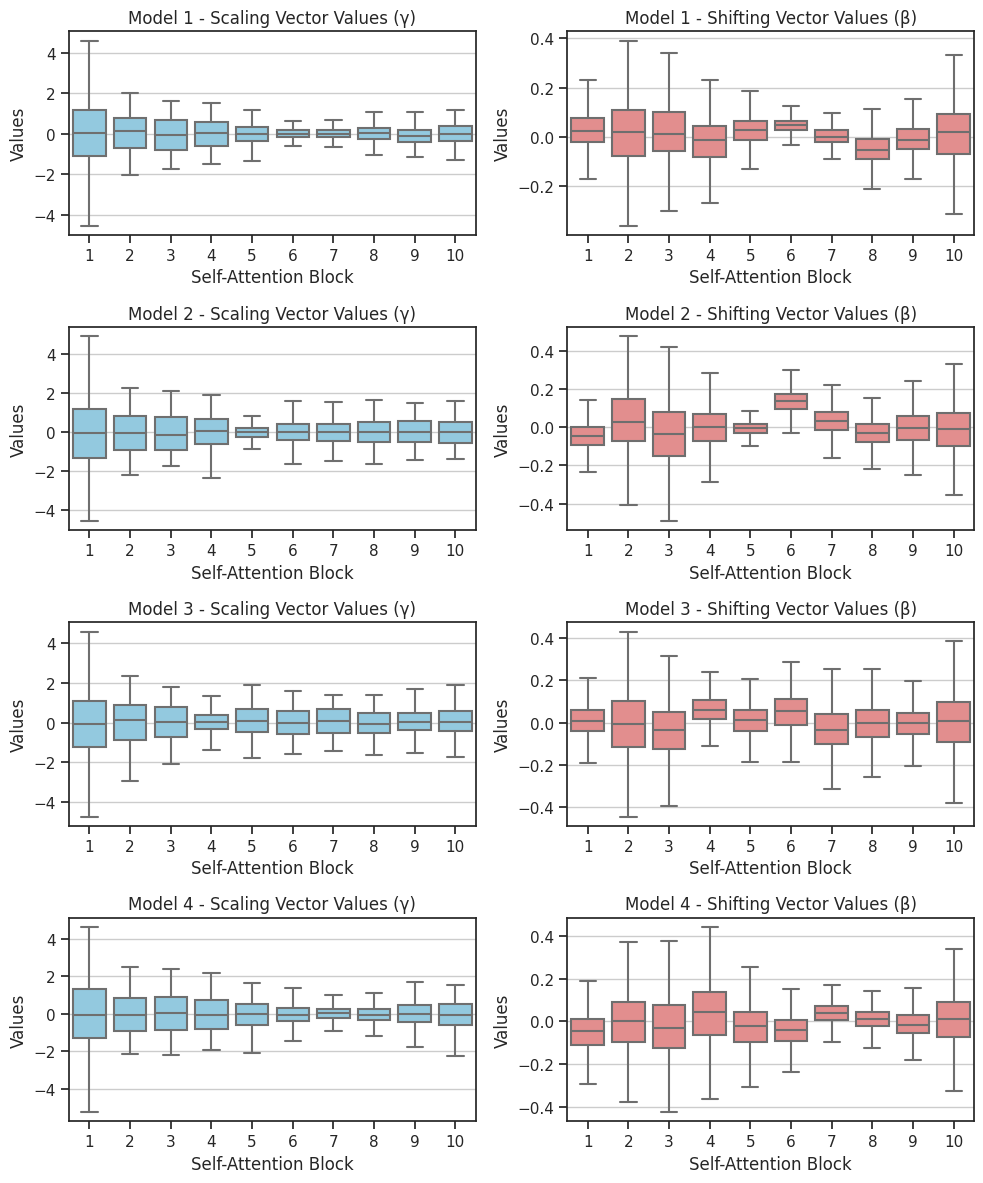

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Set the theme
sns.set_theme(style="ticks")

# Create dataframes
# df1 = pd.DataFrame({'Values': values_1, 'Self-Attention Block': labels})
# df2 = pd.DataFrame({'Values': values_2, 'Self-Attention Block': labels})

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]
ax5, ax6 = axes[2]
ax7, ax8 = axes[3]


# ================================== Model 1 ==================================
result = loaded_models[0].get_meta_vector(eval_batches[0][0])
res = tf.split(result, 20, axis=-1)

vals1 = [tf.reshape(res[i], [-1]) for i in range(0, 20, 2)]
vals2 = [tf.reshape(res[i], [-1]) for i in range(1, 20, 2)]

# Concatenate vals1 and vals2
values_1 = np.concatenate(vals1)
values_2 = np.concatenate(vals2)

# Repeat labels
labels = np.repeat([1,2,3,4,5,6,7,8,9,10], [262144] * 10)

df1 = pd.DataFrame({'Values': values_1, 'Self-Attention Block': labels})
df2 = pd.DataFrame({'Values': values_2, 'Self-Attention Block': labels})

# Plot for vals1
sns.boxplot(x='Self-Attention Block', y='Values', data=df1, showfliers=False, color='skyblue', ax=ax1)
ax1.set_title('Model 1 - Scaling Vector Values (γ)')
ax1.set_xlabel('Self-Attention Block')
ax1.set_ylabel('Values')

# Plot for vals2
sns.boxplot(x='Self-Attention Block', y='Values', data=df2, showfliers=False, color='lightcoral', ax=ax2)
ax2.set_title('Model 1 - Shifting Vector Values (β)')
ax2.set_xlabel('Self-Attention Block')
ax2.set_ylabel('Values')



# ================================== Model 2 ==================================
result = loaded_models[1].get_meta_vector(eval_batches[0][0])
res = tf.split(result, 20, axis=-1)

vals1 = [tf.reshape(res[i], [-1]) for i in range(0, 20, 2)]
vals2 = [tf.reshape(res[i], [-1]) for i in range(1, 20, 2)]

# Concatenate vals1 and vals2
values_1 = np.concatenate(vals1)
values_2 = np.concatenate(vals2)

# Repeat labels
labels = np.repeat([1,2,3,4,5,6,7,8,9,10], [262144] * 10)

df1 = pd.DataFrame({'Values': values_1, 'Self-Attention Block': labels})
df2 = pd.DataFrame({'Values': values_2, 'Self-Attention Block': labels})

# Plot for vals1
sns.boxplot(x='Self-Attention Block', y='Values', data=df1, showfliers=False, color='skyblue', ax=ax3)
ax3.set_title('Model 2 - Scaling Vector Values (γ)')
ax3.set_xlabel('Self-Attention Block')
ax3.set_ylabel('Values')

# Plot for vals2
sns.boxplot(x='Self-Attention Block', y='Values', data=df2, showfliers=False, color='lightcoral', ax=ax4)
ax4.set_title('Model 2 - Shifting Vector Values (β)')
ax4.set_xlabel('Self-Attention Block')
ax4.set_ylabel('Values')



# ================================== Model 3 ==================================
result = loaded_models[2].get_meta_vector(eval_batches[0][0])
res = tf.split(result, 20, axis=-1)

vals1 = [tf.reshape(res[i], [-1]) for i in range(0, 20, 2)]
vals2 = [tf.reshape(res[i], [-1]) for i in range(1, 20, 2)]

# Concatenate vals1 and vals2
values_1 = np.concatenate(vals1)
values_2 = np.concatenate(vals2)

# Repeat labels
labels = np.repeat([1,2,3,4,5,6,7,8,9,10], [262144] * 10)

df1 = pd.DataFrame({'Values': values_1, 'Self-Attention Block': labels})
df2 = pd.DataFrame({'Values': values_2, 'Self-Attention Block': labels})

# Plot for vals1
sns.boxplot(x='Self-Attention Block', y='Values', data=df1, showfliers=False, color='skyblue', ax=ax5)
ax5.set_title('Model 3 - Scaling Vector Values (γ)')
ax5.set_xlabel('Self-Attention Block')
ax5.set_ylabel('Values')

# Plot for vals2
sns.boxplot(x='Self-Attention Block', y='Values', data=df2, showfliers=False, color='lightcoral', ax=ax6)
ax6.set_title('Model 3 - Shifting Vector Values (β)')
ax6.set_xlabel('Self-Attention Block')
ax6.set_ylabel('Values')



# ================================== Model 4 ==================================
result = loaded_models[3].get_meta_vector(eval_batches[0][0])
res = tf.split(result, 20, axis=-1)

vals1 = [tf.reshape(res[i], [-1]) for i in range(0, 20, 2)]
vals2 = [tf.reshape(res[i], [-1]) for i in range(1, 20, 2)]

# Concatenate vals1 and vals2
values_1 = np.concatenate(vals1)
values_2 = np.concatenate(vals2)

# Repeat labels
labels = np.repeat([1,2,3,4,5,6,7,8,9,10], [262144] * 10)

df1 = pd.DataFrame({'Values': values_1, 'Self-Attention Block': labels})
df2 = pd.DataFrame({'Values': values_2, 'Self-Attention Block': labels})

# Plot for vals1
sns.boxplot(x='Self-Attention Block', y='Values', data=df1, showfliers=False, color='skyblue', ax=ax7)
ax7.set_title('Model 4 - Scaling Vector Values (γ)')
ax7.set_xlabel('Self-Attention Block')
ax7.set_ylabel('Values')

# Plot for vals2
sns.boxplot(x='Self-Attention Block', y='Values', data=df2, showfliers=False, color='lightcoral', ax=ax8)
ax8.set_title('Model 4 - Shifting Vector Values (β)')
ax8.set_xlabel('Self-Attention Block')
ax8.set_ylabel('Values')






# y_min = min(np.min(values_1), np.min(values_2))
# y_max = max(np.max(values_1), np.max(values_2))
# ax1.set_ylim(y_min, y_max)
# ax2.set_ylim(y_min, y_max)

for ax in axes.flatten():
    ax.yaxis.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Generate metadata combinations

charges = [
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
]
methods = [
    [1,0],
    [0,1]
]
machines = [
    [1,0,0],
    [0,1,0],
    [0,0,1]
]
energies = [x / 1000.0 for x in range(200, 400, 5)]

# Generate permutations
metadata_permutations = {
    'modified_sequence': [],
    'charge_oh': [],
    'collision_energy': [],
    'method_nr_oh': [],
    'machine_oh': [],
}
for charge in charges:
    for method in methods:
        for machine in machines:
            for energy in energies:
                metadata_permutations['charge_oh'].append(charge)
                metadata_permutations['method_nr_oh'].append(method)
                metadata_permutations['machine_oh'].append(machine)
                metadata_permutations['collision_energy'].append(energy)

for key,value in metadata_permutations.items():
    metadata_permutations[key] = np.array(value)

print(metadata_permutations['charge_oh'].shape)


In [6]:
int_data = FragmentIonIntensityDataset.load_from_disk("/nfs/home/students/d.lochert/projects/astral/dlomix-astral/balanced_dataset")

In [7]:
eval_batches = [m for m in int_data.tensor_test_data.take(10)]




In [ ]:
# load all models

results = []

for file in files[::1]:
    model = keras.saving.load_model(file,
                                    custom_objects={'masked_spectral_distance': masked_spectral_distance, 
                                                    'masked_pearson_correlation_distance': masked_pearson_correlation_distance}, 
                                    compile=True, safe_mode=True)
    results.append(model.get_meta_vector(metadata_permutations))
    print("Finished loading model %s" % file.split('/')[-1])

In [ ]:
res = tf.split(results[10], 20, axis=-1)

vals = [tf.math.abs(tf.reshape(res[i], [-1])) for i in range(0, 20, 2)]
keys = np.array([i for i in range(1, 11)])

std = [tf.math.reduce_mean(v) for v in vals]
plt.plot(keys, std)

In [ ]:
import matplotlib

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = [(.7, .7, (i - 1) / 48.0 * 0.5 + 0.5) for i in range(len(results))]

print(colors)

yticks = list(reversed(list(range(len(results)))   ))

print(yticks)

for color, epoch in zip(colors, yticks):

    res = tf.split(results[epoch], 20, axis=-1)
    vals = [tf.math.abs(tf.reshape(res[i], [-1])) for i in range(0, 20, 2)]
    std = [tf.math.reduce_mean(v) for v in vals]


    xs = np.arange(10)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, std, zs=epoch, color=color, zdir='y', alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

In [ ]:
'''
===================================
3D wireframe plots in one direction
===================================

Demonstrates that setting rstride or cstride to 0 causes wires to not be
generated in the corresponding direction.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})


X_ = []
Y_ = []
Z_ = []

# X_.append( list(range(10)) )
# Y_.append( [0] * 10 )
# Z_.append( [0] * 10 )

for step in range(len(results)):

    res = tf.split(results[step], 20, axis=-1)


    vals = [tf.reshape(res[i], [-1]) for i in range(1, 20, 2)]

    #vals = [tf.math.abs(v) for v in vals]

    std = [float(tf.math.reduce_std(v)) for v in vals]

    X_.append( list(range(len(std))) )

    Y_.append( [step] * len(std) )
    Z_.append( std )


# X_.append( X_[-1] )
# Y_.append( Y_[-1] )
# Z_.append( [0] * 10 )

# X_.append( list(range(10)) )
# Y_.append( [0] * 10 )
# Z_.append( [0] * 10 )

X_ = np.array(X_)
Y_ = np.array(Y_)
Z_ = np.array(Z_)

# print(X_)
# print(Y_)
# print(Z_)

# Give the first plot only wireframes of the type y = c
ax1.plot_wireframe(X_, Y_, Z_, rstride=1, cstride=1)
ax1.set_title("Column (x) stride set to 0")

# Give the second plot only wireframes of the type x = c
ax2.plot_wireframe(X_, Y_, Z_, rstride=0, cstride=1)
ax2.set_title("Row (y) stride set to 0")

plt.tight_layout()


# save plot
plt.savefig('plots/%s_%s.png' % (run_name, 'beta_std'))

plt.show()

In [ ]:
model_name = '0.5344_c_r_FiLM_full_d10_static_0.0005_9kK.keras'

subdir = 'c' + model_name.split('_c')[1].split('.keras')[0]

print(subdir)


model = keras.saving.load_model('/nfs/home/students/d.lochert/projects/astral/dlomix-astral/saved_models/%s/%s' % (subdir, model_name),
                                custom_objects={'masked_spectral_distance': masked_spectral_distance, 'masked_pearson_correlation_distance': masked_pearson_correlation_distance}, 
                                compile=True, safe_mode=True)
model.summary()

In [ ]:
int_data = FragmentIonIntensityDataset.load_from_disk("/nfs/home/students/d.lochert/projects/astral/dlomix-astral/combined_dataset")

In [ ]:
tmp = [m for m in int_data.tensor_train_data.take(42)][0][0]
tmp

In [ ]:
print(tmp['collision_energy'].numpy().min())
print(tmp['collision_energy'].numpy().max())

In [ ]:
# Use permutations 

res = model.get_meta_vector(metadata_permutations)
res = tf.split(res, 20, axis=-1)

In [ ]:
# Use data from dataset

tmp = [m for m in int_data.tensor_train_data.take(42)][0][0]

res = model.get_meta_vector(tmp)
res = tf.split(res, 20, axis=-1)

In [ ]:
# Plot scaling vector
vals = [tf.reshape(res[i], [-1])+1 for i in range(0, 20, 2)]
keys = np.array([i for i in range(1, 11)])

plt.axhline(y=1, color='r', linestyle='-')
plt.violinplot(vals, keys) 

In [ ]:
vals = [tf.reshape(res[i], [-1])+1 for i in range(0, 20, 2)]
keys = np.array([i for i in range(1, 11)])

std = [tf.math.reduce_std(v) for v in vals]
plt.plot(keys, std)

In [ ]:
# Plot shift vector
vals = [tf.reshape(res[i], [-1]) for i in range(1, 20, 2)]
keys = np.array([i for i in range(1, 11)])

plt.axhline(y=0, color='r', linestyle='-')
plt.violinplot(vals, keys)

In [ ]:
std = [tf.math.reduce_std(v) for v in vals]
plt.plot(keys, std)
